In [1]:
import os
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

In [4]:
from ggmodel_dev.graphmodel import GraphModel, converte_to_format

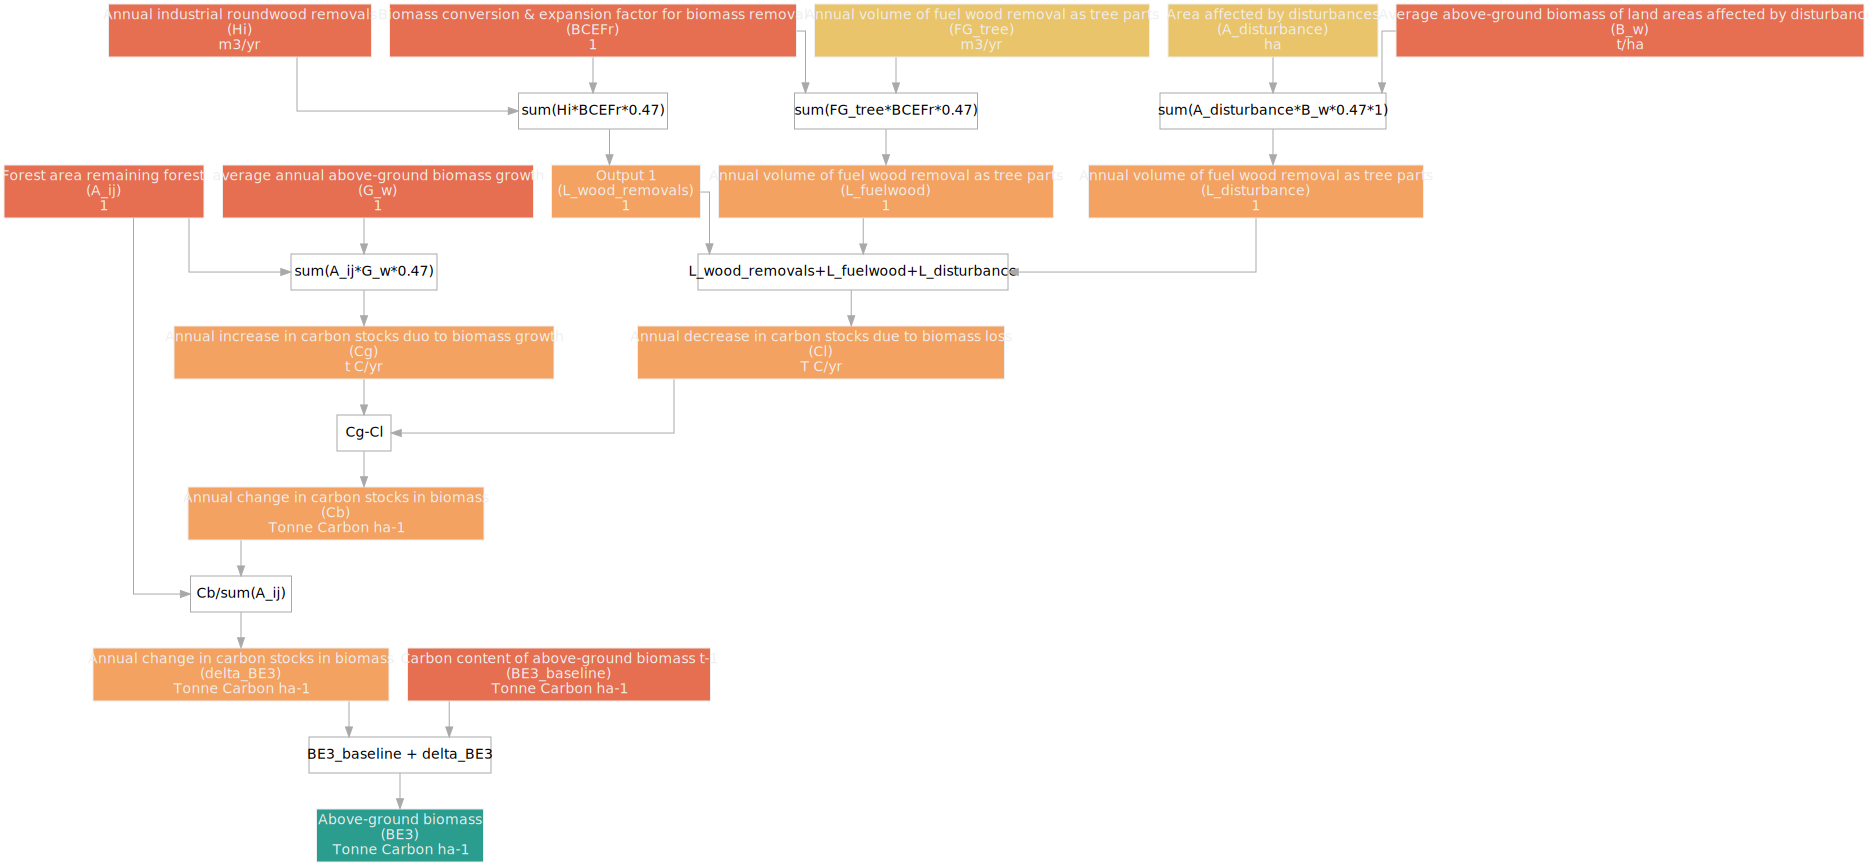

In [10]:
BE3_nodes = {
#    'R': {'type': 'input',
#             'unit': '1',
#             'name': 'Ratio of below-ground biomass to above-ground biomass'},
    'G_w': {'type': 'input',
              'unit': '1',
              'name': 'average annual above-ground biomass growth'},

#    'GTOTAL_ij': {'type': 'variable',
#              'name': 'GTOTAL_ij',
#              'unit': 'dm ha-1 yr-1',
#              'computation': lambda R, G_w, **kwargs: G_w * (1+R)
#              },
    'Cg': {'type': 'variable',
              'name': 'Annual increase in carbon stocks duo to biomass growth',
              'unit': 't C/yr',
              'computation': lambda G_w,A_ij, **kwargs: sum(A_ij*G_w*0.47)
              },
 #A_ij is a vector for forestland (natural forest & planted forest); for now take FL_stockt             
    'A_ij': {'type': 'input',
             'unit': '1',
             'name': 'Forest area remaining forest'},
    'Hi': {'type': 'input',
              'unit': 'm3/yr',
              'name': 'Annual industrial roundwood removals'},
#Where i contains coniferious and non-coniferous wood removals              
    'BCEFr': {'type': 'input',
              'unit': '1',
              'name': 'Biomass conversion & expansion factor for biomass removal'},
    'L_wood_removals': {'type': 'variable',
              'name': 'Output 1',
              'unit': '1',
              'computation': lambda Hi,BCEFr, **kwargs: sum(Hi*BCEFr*0.47)
             },
    'L_fuelwood': {'type': 'variable',
              'name': 'Annual volume of fuel wood removal as tree parts',
              'unit': '1',
              'computation': lambda FG_tree,BCEFr,  **kwargs: sum(FG_tree*BCEFr*0.47)
             },
    'FG_tree': {'type': 'parameter',
              'unit': 'm3/yr',
              'name': 'Annual volume of fuel wood removal as tree parts'},
    'A_disturbance': {'type': 'parameter',
              'unit': 'ha',
              'name': 'Area affected by disturbances'},
    'B_w': {'type': 'input',
              'unit': 't/ha',
              'name': 'Average above-ground biomass of land areas affected by disturbances'},
    'L_disturbance': {'type': 'variable',
              'name': 'Annual volume of fuel wood removal as tree parts',
              'unit': '1',
              'computation': lambda A_disturbance,B_w, **kwargs: sum(A_disturbance*B_w*0.47*1)
             },
    'Cl': {'type': 'variable',
              'name': 'Annual decrease in carbon stocks due to biomass loss',
              'unit': 'T C/yr',
              'computation': lambda L_wood_removals,L_fuelwood,L_disturbance,  **kwargs: L_wood_removals+L_fuelwood+L_disturbance
             },
    'Cb': {'type': 'variable',
              'name': 'Annual change in carbon stocks in biomass',
              'unit': 'Tonne Carbon ha-1',
              'computation': lambda Cg,Cl,  **kwargs: Cg-Cl
             },
    'delta_BE3': {'type': 'variable',
              'name': 'Annual change in carbon stocks in biomass',
              'unit': 'Tonne Carbon ha-1',
              'computation': lambda Cb,A_ij,  **kwargs: Cb/sum(A_ij)
             },
    'BE3_baseline': {'type': 'input',
              'unit': 'Tonne Carbon ha-1',
              'name': 'Carbon content of above-ground biomass t-1'},
    'BE3': {'type': 'output',
              'name': 'Above-ground biomass',
              'unit': 'Tonne Carbon ha-1',
              'computation': lambda BE3_baseline, delta_BE3,  **kwargs: BE3_baseline + delta_BE3
             },
}
GraphModel(BE3_nodes).draw()